In [5]:
# QGA_multiSolution version
import qiskit
qiskit.__version__
import matplotlib.pyplot as plt
import numpy as np
import qrng
from math import pi
import random
import seaborn as sns

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit_textbook.tools import array_to_latex

# import basic plot tools
from qiskit.visualization import plot_histogram

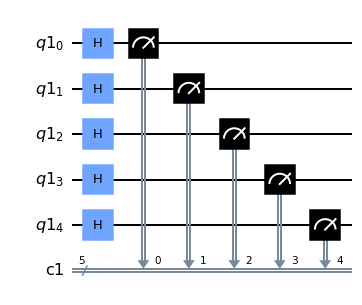

In [2]:
from qiskit import *
%matplotlib inline
Nbit = 5
# just do this once - save your token to your computer to use later (IBMQ.load_account()
# get the token from your account in https://quantum-computing.ibm.com/
#  MyAccount -> Qiskit in local environment -> Copy Token
# IBMQ.save_account('your token here....’)
### A. Build The Quantum Circuit
qr = QuantumRegister(Nbit) # quantum bit register
cr = ClassicalRegister(Nbit) # classical bit register
circuit = QuantumCircuit(qr, cr)
# create a quantum circuit containing 5 qubits
# all qubits in superposition (50%:50% chance to be in |0> or |1>) and independent of each other
circuit.h(qr)
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=1)

In [3]:
### B2. Execute the Quantum Circuit in real Quantum Computer on IBM Quantum Computing Experience
# Run our quantum circuit on The "Quantum Computer on IBM Cloud" by submitting a job containing our defined quantum circuit
from qiskit.tools.monitor import job_monitor
# load saved credential to access IBM Quantum Computing Experience on IBM Cloud
IBMQ.load_account()
# define the backend IBM quantum computer simulator to use
qprovider = IBMQ.get_provider('ibm-q')
backends = qprovider.backends()
backends

/Users/johnsu/opt/anaconda3/envs/Q_env/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [4]:
from qiskit.tools.monitor import job_monitor
rnd_list = []
cnt = 0
for num in range(13):
    IBMQ.load_account()
    qprovider = IBMQ.get_provider('ibm-q')
    qbackend = qprovider.get_backend('ibmqx2')
    job = execute(circuit, backend=qbackend, shots=8192, memory=True)
    job_monitor(job)
    rawvalues_ibmq = job.result().get_memory()
    for elm in rawvalues_ibmq:
        number = int(elm, 2)
        rnd_list.append(repr(number/(2**Nbit)))
        cnt+=1

print(rnd_list)
print(cnt)

ibmqfactory.load_account:WARNING:2021-04-15 10:16:01,258: Credentials are already in use. The existing account in the session will be replaced.
Job Status: job has successfully run
/Users/johnsu/opt/anaconda3/envs/Q_env/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-04-15 10:21:18,930: Credentials are already in use. The existing account in the session will be replaced.
Job Status: job has successfully run
ibmqfactory.load_account:WARNING:2021-04-15 10:24:13,397: Credentials are already in use. The existing account in the session will be replaced.
Job Status: job has successfully run
ibmqfactory.load_account:WARNING:2021-04-15 10:30:12,764: Credentials are already in use. The existing account in the session will be replaced.
Job Stat

In [7]:
f = open("Qrnd_real.txt", "w")
for line in rnd_list:
    f.write(f'{line}\n')
f.close()

### Simulator 

In [10]:
def get_Qrnd():
    '''
    Function to get random number from a Qubit in Quantum Computer.
    '''
    qrng.set_backend() #connect to the k qubit by quantum computer
    rnd = qrng.get_random_float(0,1) #generate a random N bit float between 0 to 1
    return rnd

cnt_simulator = 0
rnd_simulator = []
for i in range(10**5):
    rnd_simulator.append(get_Qrnd())
    cnt_simulator += 1
print(rnd_simulator)
print(cnt_simulator)



[0.573753833770752, 0.25818824768066406, 0.9709368944168091, 0.643120527267456, 0.9375075101852417, 0.1499272584915161, 0.9398741722106934, 0.761559247970581, 0.5810151100158691, 0.9543812274932861, 0.369817852973938, 0.9760607481002808, 0.31040072441101074, 0.11286294460296631, 0.6955572366714478, 0.5935996770858765, 0.7764469385147095, 0.006238102912902832, 0.348453164100647, 0.6489361524581909, 0.33360958099365234, 0.18570637702941895, 0.014470577239990234, 0.3274029493331909, 0.627888560295105, 0.7493889331817627, 0.8106772899627686, 0.9747555255889893, 0.24851036071777344, 0.2048860788345337, 0.5429555177688599, 0.9522511959075928, 0.2579864263534546, 0.8813154697418213, 0.07896292209625244, 0.15676343441009521, 0.547707200050354, 0.23433303833007812, 0.16627979278564453, 0.8628499507904053, 0.42740535736083984, 0.48682379722595215, 0.20707213878631592, 0.3659878969192505, 0.11766338348388672, 0.8680256605148315, 0.6420712471008301, 0.19501113891601562, 0.68163001537323, 0.3220980

In [12]:
f = open("Qrnd_simulate.txt", "w")
for line in rnd_simulator:
    f.write(f'{line}\n')
f.close()

In [19]:
import random
Qrnd_realList = []
f = open("Qrnd_real.txt", "r")
line = f.read().splitlines()
line = list(map(float, line))
cnt_w = 0
for weight in line:
    rnd_neg = random.random()
    if rnd_neg <= 0.5:
        Qrnd_realList.append(weight * (-1))
        cnt_w += 1
    else:
        Qrnd_realList.append(weight)
        cnt_w += 1
Qrnd_realList

[-0.5,
 -0.125,
 0.53125,
 0.1875,
 0.84375,
 0.96875,
 -0.375,
 0.375,
 -0.1875,
 0.34375,
 0.84375,
 -0.46875,
 -0.28125,
 0.375,
 -0.53125,
 -0.46875,
 -0.375,
 0.78125,
 -0.625,
 -0.75,
 -0.875,
 0.5625,
 -0.0,
 0.21875,
 -0.1875,
 -0.4375,
 -0.375,
 0.71875,
 0.21875,
 0.71875,
 0.53125,
 0.03125,
 -0.34375,
 -0.46875,
 0.53125,
 -0.71875,
 -0.84375,
 -0.5,
 -0.375,
 0.21875,
 0.84375,
 -0.375,
 -0.4375,
 -0.59375,
 -0.75,
 -0.59375,
 0.34375,
 -0.1875,
 -0.1875,
 -0.875,
 0.25,
 -0.09375,
 -0.125,
 0.1875,
 -0.4375,
 0.875,
 0.3125,
 -0.90625,
 0.375,
 -0.15625,
 0.125,
 0.5625,
 0.40625,
 0.65625,
 -0.75,
 0.75,
 -0.46875,
 -0.34375,
 -0.1875,
 -0.3125,
 -0.21875,
 -0.34375,
 0.15625,
 0.28125,
 0.90625,
 -0.8125,
 0.3125,
 0.8125,
 0.3125,
 0.5,
 -0.84375,
 -0.5625,
 0.53125,
 -0.78125,
 -0.34375,
 0.1875,
 -0.65625,
 0.6875,
 -0.375,
 0.65625,
 0.5,
 0.1875,
 0.90625,
 0.53125,
 0.90625,
 0.875,
 0.84375,
 -0.65625,
 -0.0,
 0.5625,
 0.59375,
 0.25,
 -0.03125,
 0.40625,
 -0.937

In [20]:
cnt_w

106496

In [21]:
f = open("Qrnd_real_neg.txt", "w")
for num in Qrnd_realList:
    f.write(f'{num}\n')
f.close()